In [1]:
import pandas as pd
data = pd.read_csv('gbm-data.csv', delim_whitespace=False, index_col='Activity')
print(data[:3])

                D1        D2    D3   D4        D5        D6        D7  \
Activity                                                                
1         0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
1         0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   

                D8        D9       D10  ...    D1767  D1768  D1769  D1770  \
Activity                                ...                                 
1         0.585445  0.743663  0.243144  ...        0      0      0      0   
1         0.411754  0.836582  0.106480  ...        1      1      1      1   
1         0.517720  0.679051  0.352308  ...        0      0      0      0   

          D1771  D1772  D1773  D1774  D1775  D1776  
Activity                                            
1             0      0      0      0      0      0  
1             0      1      0      0      1      0  
1             0      0      0      0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.values, data.index, test_size=0.8, random_state=241)

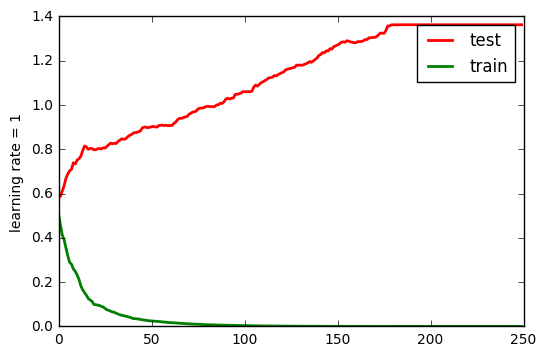

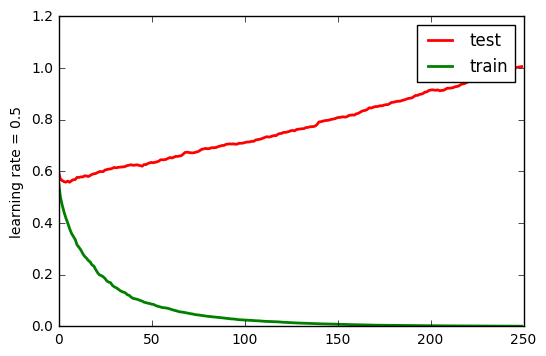

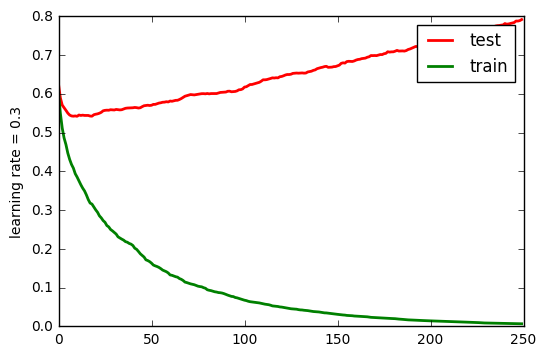

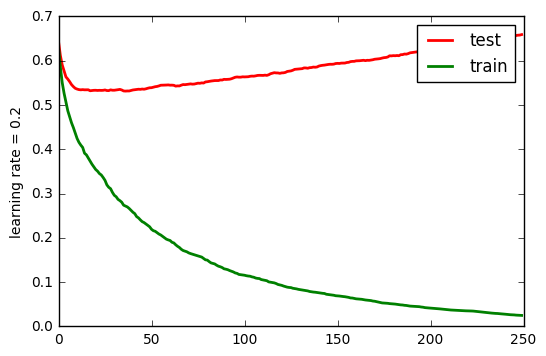

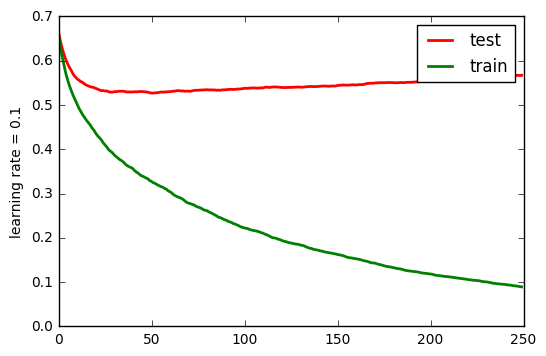

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
min_train_loss = []
min_test_loss = []
for rate in learning_rate:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=rate)
    clf.fit(X_train, y_train)
    test_loss = []
    test_function = clf.staged_decision_function(X_test)
    for value in test_function:
        good_value = 1 / (1 + np.exp(-value))
        test_loss.append(log_loss(y_test, good_value))
    train_loss = []
    train_function = clf.staged_decision_function(X_train)
    for value in train_function:
        good_value = 1 / (1 + np.exp(-value))
        train_loss.append(log_loss(y_train, good_value))
    min_test_loss.append([rate, np.min(test_loss), test_loss.index(np.min(test_loss))])
    min_train_loss.append([rate, np.min(train_loss), train_loss.index(np.min(train_loss))])
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.ylabel('learning rate = %s' % rate)

In [22]:
print(min_train_loss)
print(min_test_loss)
for min_loss in min_test_loss:
    if min_loss[0] == 0.2:
        print(round(min_loss[1], 2), min_loss[2])

[[1, 0.00020857611394801512, 180], [0.5, 0.0010223680763683195, 249], [0.3, 0.0068872910014473624, 249], [0.2, 0.024906124380084917, 249], [0.1, 0.089369624162740857, 249]]
[[1, 0.58229425942784763, 0], [0.5, 0.55820255231642613, 6], [0.3, 0.54231411100245541, 10], [0.2, 0.53145079631906378, 36], [0.1, 0.52692018722758438, 51]]
0.53 36


In [24]:
clf = GradientBoostingClassifier(random_state=241, n_estimators=36)
clf.fit(X_train, y_train)
prediction = clf.predict_proba(X_test)
score = log_loss(y_test, prediction)
print(round(score, 2))

0.53
